### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [256]:
data = pd.read_csv('data/coupons.csv')

In [209]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [211]:
# Print feature columns
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [212]:
# Print non numeric uniq columns
for col in data.columns:
    if data[col].dtype != 'int64':
        print(col, data[col].unique()) 

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Constr

In [213]:
fig = px.bar(data.isnull().sum())
fig.update_layout(title='Null values in each column', xaxis_title='Column', yaxis_title='Number of null values')
fig.show()

In [214]:
cleaned_data = data.copy()
cleaned_data = cleaned_data.drop(columns=['car'])
cleaned_data = cleaned_data.dropna()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [218]:
# Replace null with 'unknown'
for col in cleaned_data.columns:
    if cleaned_data[col].isnull().any():
        cleaned_data[col] = cleaned_data[col].fillna('UNKNOWN')

In [219]:
# verify using the fig
fig = px.bar(cleaned_data.isnull().sum())
fig.update_layout(title='Null values in each column', xaxis_title='Column', yaxis_title='Number of null values')
fig.show()

4. What proportion of the total observations chose to accept the coupon?


In [258]:
accepted_coupon_count=cleaned_data.query('Y==1')['Y'].count()
total=cleaned_data['Y'].count();
accepted_coupon_percentage=accepted_coupon_count/total*100
print("Coupon Accepted Count: ", accepted_coupon_count)
print("Coupon Accepted Percentage: ", accepted_coupon_percentage)


Coupon Accepted Count:  6877
Coupon Accepted Percentage:  56.93352098683666


### 56.9% of customers accepted the coupon.

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

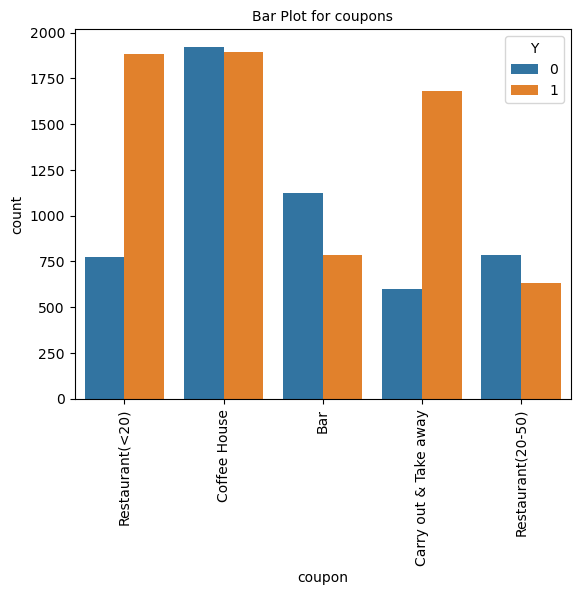

In [262]:
sns.countplot(data = cleaned_data, x = "coupon", hue = 'Y')
plt.title('Bar Plot for coupons', size = 10)
plt.xticks(rotation=90)

The barplot displayed above illustrates the varying acceptance levels of coupons across different establishments. It indicates that the Coffee House received the highest acceptance rate, while expensive restaurants encountered the lowest acceptance. Notably, the percentage of coupons being accepted rather than rejected was highest for Carry out and affordable restaurants.

6. Use a histogram to visualize the temperature column.

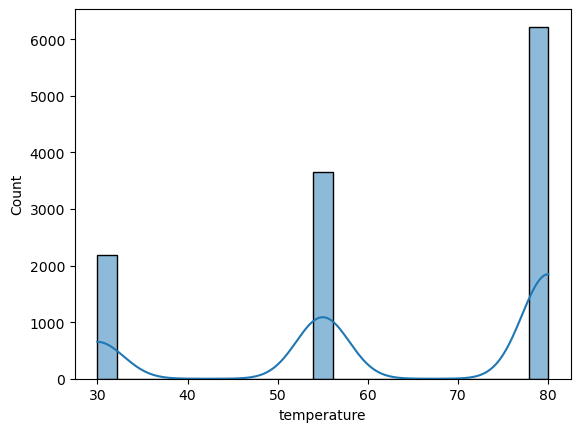

In [223]:
sns.histplot(data=cleaned_data, x = 'temperature', kde=True)
plt.show()

The histogram above depicts the distribution of temperatures, revealing that the most frequently occurring temperature at the time when the passenger received the coupon was 80 degrees.

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [264]:
df_bar = cleaned_data.query('coupon == "Bar"')
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [265]:
bar_coupons_accepted = df_bar['Y'].mean() * 100
bar_coupons_accepted

41.19184526921067

### 41% bar coupons accepted by customers

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [266]:
bar_df['Bar'].value_counts()


never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

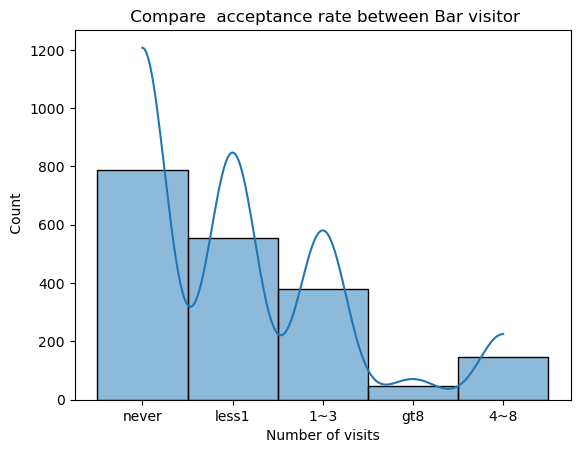

In [267]:
sns.histplot(data=bar_df, x='Bar', kde=True).set(title=' Compare  acceptance rate between Bar visitor',xlabel='Number of visits', ylabel=' Count')

plt.show()

In [252]:
bar_more3 = ["4~8", "gt8"]
df_bar2 = df_bar.copy()
df_bar2['more_than_3_visits'] = np.where(df_bar2['Bar'].isin(bar_more3), True, False)
df_bar2.groupby('more_than_3_visits')['Y'].mean()



more_than_3_visits
False    0.370737
True     0.768844
Name: Y, dtype: float64

<AxesSubplot:xlabel='Bar'>

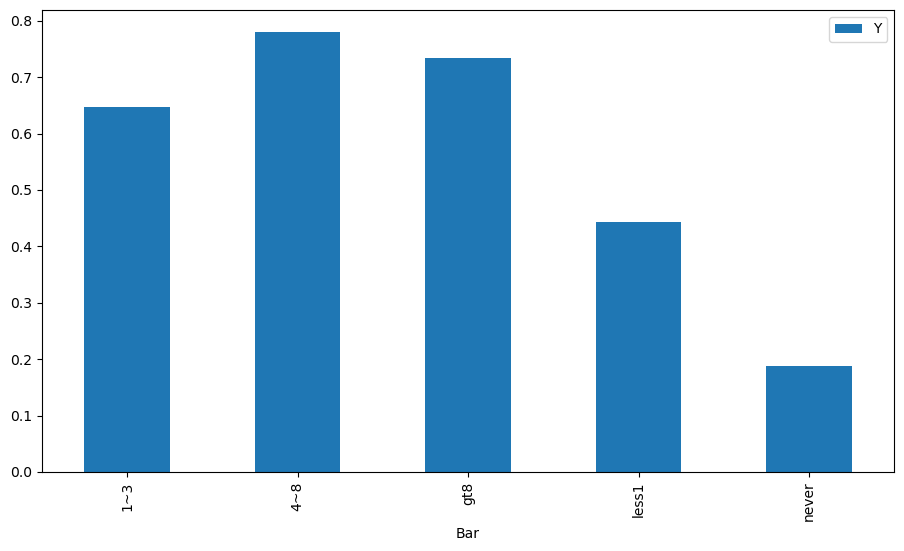

In [253]:
# Visualize
df_bar2.groupby(['Bar']).mean().plot(kind='bar', y='Y', figsize = (11,6))


### The highest acceptance is for the people who go to bar more than 3 times which is 76%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [254]:
bar_more1 = ["1~3", "4~8", "gt8"]
age_less25 = ['21', 'below21']

# create column for above conditions
df_bar2.loc[:,'Bar_more1_age_more25'] = np.where((df_bar2['Bar'].isin(bar_more1)) & (~df_bar2['age'].isin(age_less25)), True, False)
df_bar2.groupby('Bar_more1_age_more25')['Y'].mean()

Bar_more1_age_more25
False    0.335003
True     0.695238
Name: Y, dtype: float64

### It appears that drivers who are over 25 years and go to the bar more than once a month are more likely to accept the coupon (~70%)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [250]:
bar_more1 = ["1~3", "4~8", "gt8"]
occ = ["farming", "fishing", "forestry"]
passan = ["Kid(s)"]

df_bar2['Bar_more1_notkid_and_otherocc'] = np.where((df_bar2['Bar'].isin(bar_more1)) & (~df_bar2['passanger'].isin(passan)) & (~df_bar2['occupation'].isin(occ)), True, False)
df_bar2.groupby('Bar_more1_notkid_and_otherocc')['Y'].mean()


Bar_more1_notkid_and_otherocc
False    0.296044
True     0.713249
Name: Y, dtype: float64

From analysis, the drivers who go more than once, had passengers not kids and occupation sother than farming, fishing, or forestry acceptance rate is 71%.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [247]:
bar_more1 = ["1~3", "4~8", "gt8"]
occ = ["farming", "fishing", "forestry"]
passan = ["Kid(s)"]
wid = ['widowed']
cheap_rest = ["4~8", "gt8"]
age_less30 = ['21', 'below21', '26']
income_more50 = ['$50000 - $62499', '$75000 - $87499', '$87500 - $99999', '$62500 - $74999']


df_bar2['Bar_conditions'] = np.where(((df_bar['Bar'].isin(bar_more1)) & (~df_bar['passanger'].isin(passan)) \
                                    & (~df_bar['maritalStatus'].isin(wid))) | \
                                    ((df_bar['Bar'].isin(bar_more1)) & (df_bar['age'].isin(age_less30))) |\
                                    ((df_bar['RestaurantLessThan20'].isin(cheap_rest)) & (~df_bar['income'].isin(income_more50))),\
                                    True, False)
df_bar2.groupby('Bar_conditions')['Y'].mean()

Bar_conditions
False    0.295213
True     0.555681
Name: Y, dtype: float64

### Based on the above several bar conditions, the driver coupon acceptance rate is 55%

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Obseverations:

The following passenger characteristics are strongly associated with accepting the bar coupon:

Being younger drivers, predominantly in the age range of 21 to 26.
Visiting bars approximately 3 or more times.
Traveling alone in their vehicles.
Occupations outside of farming, fishing, and forestry.
Drivers with kids as passengers less likely to accept the bar coupons

Passengers displaying these characteristics are more likely to accept the bar coupon.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Would like to explore Carry out & take Away coupons.

1. Create new Data frame for carry out take away

In [274]:
df_carry_out_take_away = cleaned_data.query('coupon == "Carry out & Take away"')

In [275]:
df_carry_out_take_away

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


2. Fix any null values

In [276]:
df_carry_out_take_away.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

3. What portion of Carry out take away coupons accepted?


In [277]:
accpect = df_carry_out_take_away['Y'].mean()
accpect

0.737719298245614

73% Carry out & Take Away coupons are accepted.

4. What percentage accepted by gender

Text(0.5, 1.0, 'Number of Visits for accepted coupons')

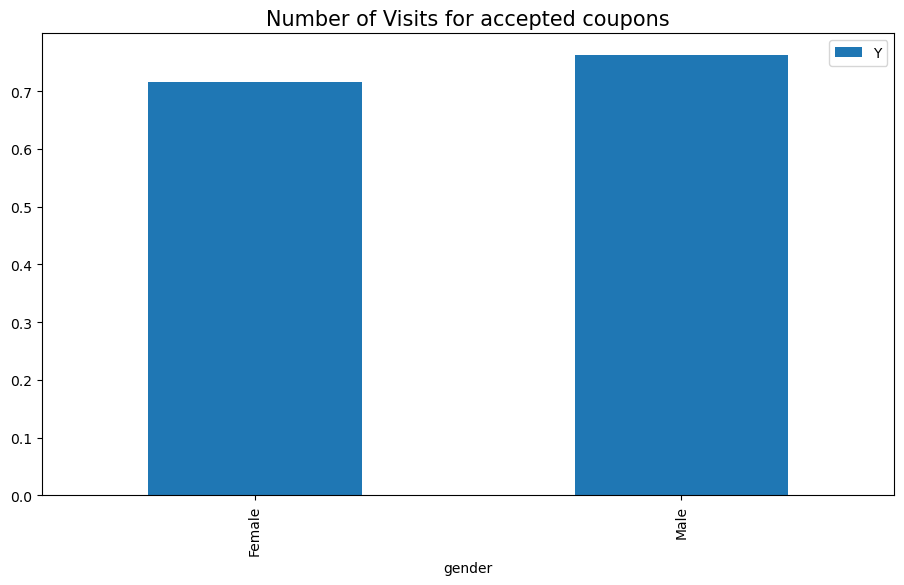

In [279]:
df_carry_out_take_away.groupby(['gender']).mean().plot(kind='bar', y='Y', figsize = (11,6))
plt.title('Number of Visits for accepted coupons', size = 15)

Male accepted the coupons slightly more than females.

4. Compare age, sex and coupon acceptance

Text(0.5, 1.0, 'Histogram of Age and Gender of REJECTED coupons')

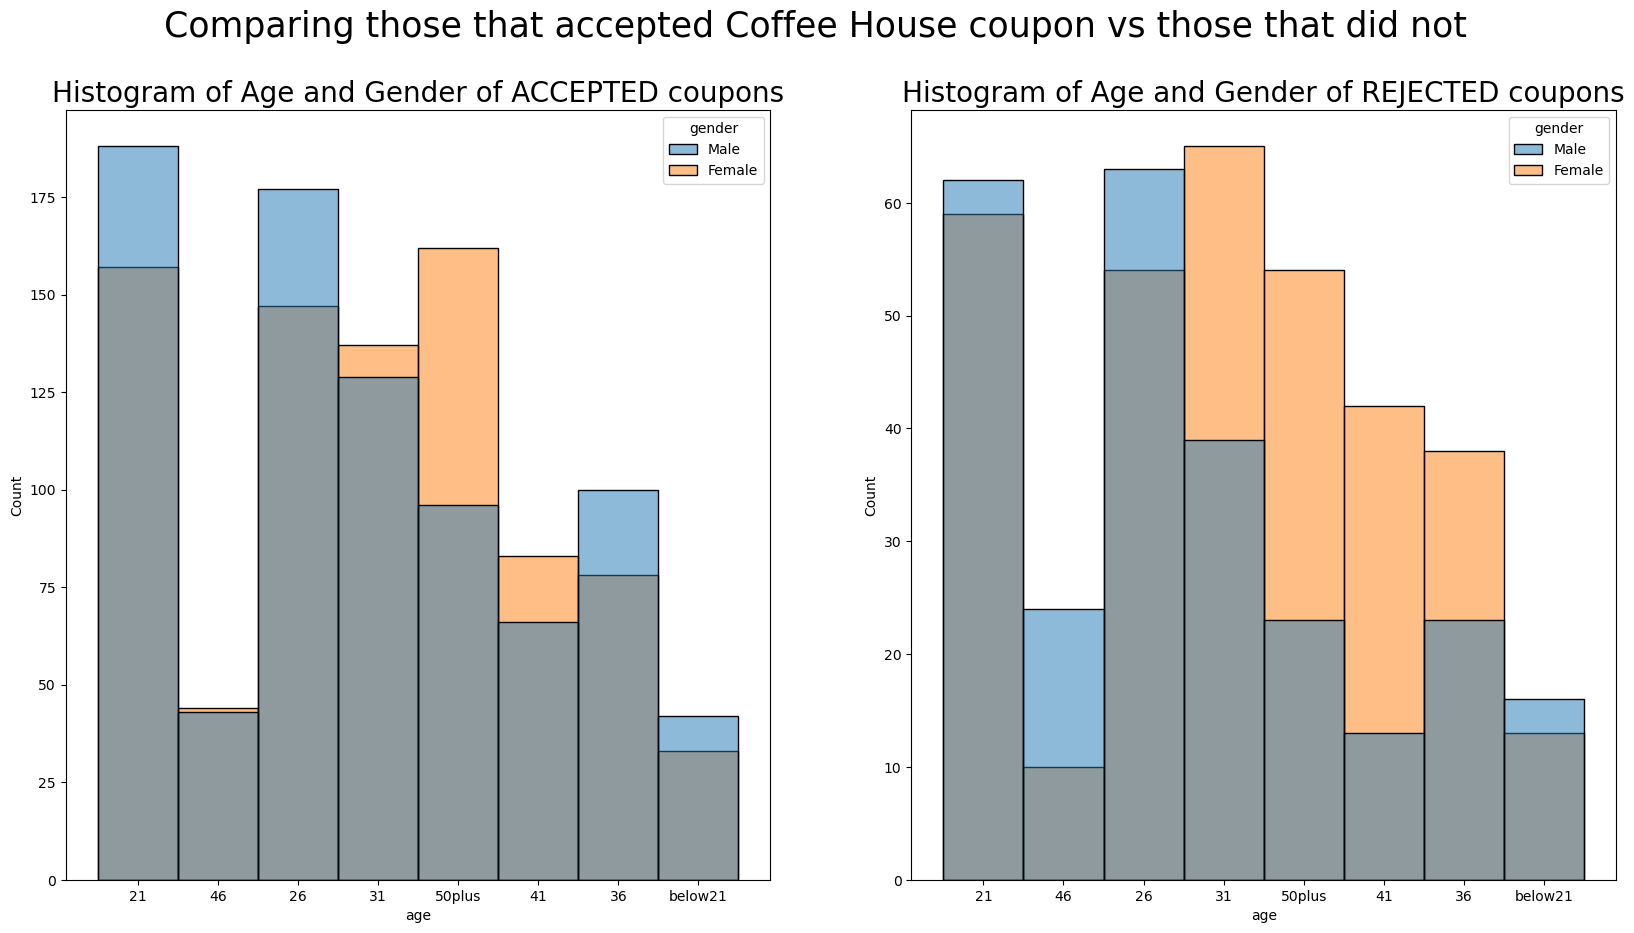

In [280]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
fig.suptitle('Comparing those that accepted Coffee House coupon vs those that did not', size = 25)

sns.histplot(df_carry_out_take_away.query('Y == 1'), ax = axes[0], x = 'age', hue = 'gender')
axes[0].set_title('Histogram of Age and Gender of ACCEPTED coupons', size = 20)

sns.histplot(df_carry_out_take_away.query('Y == 0'), ax = axes[1], x = 'age', hue = 'gender')
axes[1].set_title('Histogram of Age and Gender of REJECTED coupons', size = 20)

Male with 21 accepted the coupons more than any one else. Interestingly, females of age 50plus accepted more.
Female age 30 or more rejected more carry out & take away coupons

5. Compare Drivers who are less than 21 year old and male


In [282]:
age_less25 = ['below21']

df_carry_out_take_away['co_ta_male_age21'] = np.where((df_carry_out_take_away['gender']== 'Male') & (df_carry_out_take_away['age'].isin(age_less25)), True, False)
df_carry_out_take_away.groupby('co_ta_male_age21')['Y'].mean()

/var/folders/kh/5sdlvgfs57j947fs9lv2mmmm0000gn/T/ipykernel_16811/2410225961.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



co_ta_male_age21
False    0.738074
True     0.724138
Name: Y, dtype: float64

The acceptance & rejection creteria for males under 21 is almost same for carry out take away coupons.

5. Compare the acceptance rates with following conditions:
    
    male and single OR
    male and under age of 21

In [283]:
marStatus = ["Single"]
age_less21 = ['below21'] 


df_carry_out_take_away['co_ta__conditions'] = np.where(((df_carry_out_take_away['gender']== 'Male') & (df_carry_out_take_away['maritalStatus'].isin(marStatus)) |\
                                    ((df_carry_out_take_away['gender']== 'Male') & (df_carry_out_take_away['age'].isin(age_less21)))),\
                                    True, False)
df_carry_out_take_away.groupby('co_ta__conditions')['Y'].mean()

/var/folders/kh/5sdlvgfs57j947fs9lv2mmmm0000gn/T/ipykernel_16811/3638831955.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



co_ta__conditions
False    0.731917
True     0.756506
Name: Y, dtype: float64

male and single OR male and under age of 21 acceptane is 75% which is slightly higher than the others.

### Observations for Carry Out & Take Away Coupons

* 73% Carry out & Take Away coupons are accepted.
* Male with 21 accepted the coupons more than any one else. Interestingly, females of age 50plus accepted more. Female age 30 or more rejected more carry out & take away coupons
* The acceptance & rejection creteria for males under 21 is almost same for carry out take away coupons.
* male and single OR male and under age of 21 acceptane is 75% which is slightly higher than the others.
